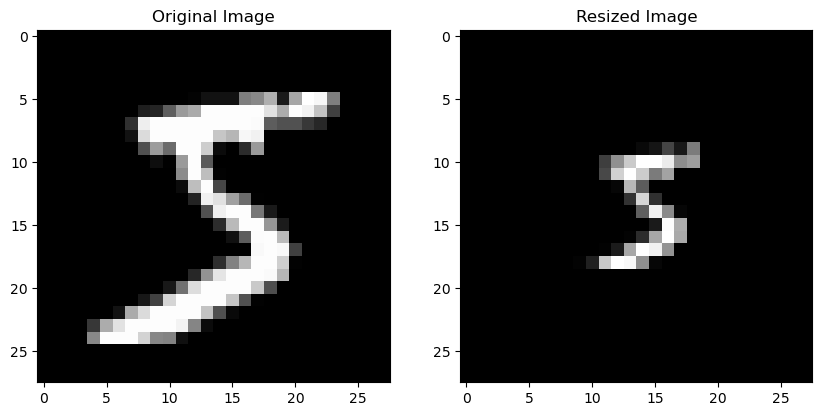

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import measure
from skimage.transform import resize
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Function to resize digits within each image
def resize_digits(images, scale_factor):
    resized_images = []
    for img in images:
        # Find contours to identify bounding box around digit
        contours = measure.find_contours(img, 0.8)

        # Get bounding box coordinates
        ymin, xmin = np.min(contours[0], axis=0)
        ymax, xmax = np.max(contours[0], axis=0)

        # Extract digit region
        digit_region = img[int(ymin):int(ymax), int(xmin):int(xmax)]

        # Resize digit region
        resized_digit = cv2.resize(digit_region, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

        # Create a blank image with the original shape
        resized_img = np.zeros_like(img)

        # Place the resized digit back into the original image
        x_offset = int((img.shape[1] - resized_digit.shape[1]) / 2)
        y_offset = int((img.shape[0] - resized_digit.shape[0]) / 2)
        resized_img[y_offset:y_offset + resized_digit.shape[0], x_offset:x_offset + resized_digit.shape[1]] = resized_digit

        resized_images.append(resized_img)
    return np.array(resized_images)

# Resize digits within train and test images
scale_factor = 0.51 # You can adjust this as needed
train_resized = resize_digits(train_images, scale_factor)
test_resized = resize_digits(test_images, scale_factor)

# Visualize original and resized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0], cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(train_resized[0], cmap='gray')
plt.title('Resized Image')
plt.show()

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load the original MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model_original = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_original.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_original.fit(train_images, train_labels, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model_original.evaluate(test_images, test_labels)
print('Model trained on original, tested on original MNIST test accuracy:', test_acc)




Epoch 1/100


750/750 [==============================] - 11s 13ms/step - loss: 0.2218 - accuracy: 0.9332 - val_loss: 0.0856 - val_accuracy: 0.9750
Epoch 2/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0579 - accuracy: 0.9816 - val_loss: 0.0514 - val_accuracy: 0.9842
Epoch 3/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.0439 - val_accuracy: 0.9868
Epoch 4/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0431 - val_accuracy: 0.9881
Epoch 5/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0373 - val_accuracy: 0.9896
Epoch 6/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0346 - val_accuracy: 0.9905
Epoch 7/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.0404 - v

In [4]:
# Preprocess the resized data
train_resized = train_resized.reshape((train_resized.shape[0], 28, 28, 1)).astype('float32') / 255
test_resized = test_resized.reshape((test_resized.shape[0], 28, 28, 1)).astype('float32') / 255

# Build the CNN model for resized MNIST dataset
model_resized = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_resized.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_resized.fit(train_resized, train_labels, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss_resized, test_acc_resized = model_resized.evaluate(test_resized, test_labels)
print('Model trained on modified, tested on modified MNIST test accuracy', test_acc_resized)

Epoch 1/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3244 - accuracy: 0.8996 - val_loss: 0.1166 - val_accuracy: 0.9647
Epoch 2/100
750/750 [==============================] - 9s 12ms/step - loss: 0.1018 - accuracy: 0.9691 - val_loss: 0.0860 - val_accuracy: 0.9732
Epoch 3/100
750/750 [==============================] - 9s 13ms/step - loss: 0.0783 - accuracy: 0.9754 - val_loss: 0.0853 - val_accuracy: 0.9743
Epoch 4/100
750/750 [==============================] - 9s 12ms/step - loss: 0.0643 - accuracy: 0.9796 - val_loss: 0.0663 - val_accuracy: 0.9793
Epoch 5/100
750/750 [==============================] - 9s 12ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0693 - val_accuracy: 0.9785
Epoch 6/100
750/750 [==============================] - 9s 12ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.0765 - val_accuracy: 0.9787
Epoch 7/100
750/750 [==============================] - 9s 12ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0752 - val_accuracy

In [7]:
# Evaluate the model trained on standard MNIST dataset on resized MNIST dataset
test_loss_original_resized, test_acc_original_resized = model_original.evaluate(test_resized, test_labels)
print('Model trained on original, tested on modified MNIST test accuracy:', test_acc_original_resized)

313/313 [==============================] - 1s 3ms/step - loss: 4.4927 - accuracy: 0.5818
Model trained on original, tested on modified MNIST test accuracy: 0.5817999839782715


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Function to resize digits within each image
def resize_digits(images, scale_factor):
    resized_images = []
    for img in images:
        # Find contours to identify bounding box around digit
        contours = measure.find_contours(img, 0.8)

        # Get bounding box coordinates
        ymin, xmin = np.min(contours[0], axis=0)
        ymax, xmax = np.max(contours[0], axis=0)

        # Extract digit region
        digit_region = img[int(ymin):int(ymax), int(xmin):int(xmax)]

        # Resize digit region
        if scale_factor > 0:  # Ensure scale factor is greater than 0
            if scale_factor >= 1:
                resized_digit = cv2.resize(digit_region, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
            else:
                resized_digit = cv2.resize(digit_region, (max(1, int(digit_region.shape[1] * scale_factor)), max(1, int(digit_region.shape[0] * scale_factor))), interpolation=cv2.INTER_LINEAR)
        else:
            resized_digit = digit_region.copy()  # If scale factor is 0 or negative, keep the original size
        
        # Create a blank image with the original shape
        resized_img = np.zeros_like(img)

        # Place the resized digit back into the original image
        x_offset = int((img.shape[1] - resized_digit.shape[1]) / 2)
        y_offset = int((img.shape[0] - resized_digit.shape[0]) / 2)
        resized_img[y_offset:y_offset + resized_digit.shape[0], x_offset:x_offset + resized_digit.shape[1]] = resized_digit

        resized_images.append(resized_img)
    return np.array(resized_images)

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Function to preprocess and reshape MNIST data
def preprocess_mnist(images, labels):
    images = images.reshape((images.shape[0], 28, 28, 1)).astype('float32') / 255
    labels = to_categorical(labels)
    return images, labels

# Preprocess the original MNIST dataset
train_images, train_labels = preprocess_mnist(train_images, train_labels)
test_images, test_labels = preprocess_mnist(test_images, test_labels)

# Load the model trained on the resized MNIST dataset
# Assuming model_resized is already trained

# Resize the original MNIST test images to match the size used during training of the resized model
scale_factor = 0.51  # Assuming the same scale factor used during training of the resized model
test_images_resized = resize_digits(test_images[:, :, :, 0], scale_factor)

# Preprocess the resized test images
test_images_resized = test_images_resized.reshape((test_images_resized.shape[0], 28, 28, 1)).astype('float32') / 255

# Load the model trained on the resized MNIST dataset
# Assuming model_resized is already trained

# Evaluate the model trained on resized MNIST dataset on standard MNIST dataset
test_loss_resized_original, test_acc_resized_original = model_resized.evaluate(test_images_resized, test_labels)
print('Model trained on modified, tested on original MNIST test accuracy:', test_acc_resized_original)

313/313 [==============================] - 1s 3ms/step - loss: 2.4478 - accuracy: 0.1011
Model trained on modified, tested on original MNIST test accuracy: 0.10109999775886536


In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the original MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model_original = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_original.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_original.fit(train_images, train_labels, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model_original.evaluate(test_images, test_labels)
print('Model trained on original, tested on original MNIST test accuracy:', test_acc)



# Preprocess the resized data
train_resized = train_resized.reshape((train_resized.shape[0], 28, 28, 1)).astype('float32') / 255
test_resized = test_resized.reshape((test_resized.shape[0], 28, 28, 1)).astype('float32') / 255

# Build the CNN model for resized MNIST dataset
model_resized = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_resized.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_resized.fit(train_resized, train_labels, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss_resized, test_acc_resized = model_resized.evaluate(test_resized, test_labels)
print('Model trained on modified, tested on modified MNIST test accuracy', test_acc_resized)


# Evaluate the model trained on standard MNIST dataset on resized MNIST dataset
test_loss_original_resized, test_acc_original_resized = model_original.evaluate(test_resized, test_labels)
print('Model trained on original, tested on modified MNIST test accuracy:', test_acc_original_resized)




# Function to resize digits within each image
def resize_digits(images, scale_factor):
    resized_images = []
    for img in images:
        # Find contours to identify bounding box around digit
        contours = measure.find_contours(img, 0.8)

        # Get bounding box coordinates
        ymin, xmin = np.min(contours[0], axis=0)
        ymax, xmax = np.max(contours[0], axis=0)

        # Extract digit region
        digit_region = img[int(ymin):int(ymax), int(xmin):int(xmax)]

        # Resize digit region
        if scale_factor > 0:  # Ensure scale factor is greater than 0
            if scale_factor >= 1:
                resized_digit = cv2.resize(digit_region, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
            else:
                resized_digit = cv2.resize(digit_region, (max(1, int(digit_region.shape[1] * scale_factor)), max(1, int(digit_region.shape[0] * scale_factor))), interpolation=cv2.INTER_LINEAR)
        else:
            resized_digit = digit_region.copy()  # If scale factor is 0 or negative, keep the original size
        
        # Create a blank image with the original shape
        resized_img = np.zeros_like(img)

        # Place the resized digit back into the original image
        x_offset = int((img.shape[1] - resized_digit.shape[1]) / 2)
        y_offset = int((img.shape[0] - resized_digit.shape[0]) / 2)
        resized_img[y_offset:y_offset + resized_digit.shape[0], x_offset:x_offset + resized_digit.shape[1]] = resized_digit

        resized_images.append(resized_img)
    return np.array(resized_images)

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Function to preprocess and reshape MNIST data
def preprocess_mnist(images, labels):
    images = images.reshape((images.shape[0], 28, 28, 1)).astype('float32') / 255
    labels = to_categorical(labels)
    return images, labels

# Preprocess the original MNIST dataset
train_images, train_labels = preprocess_mnist(train_images, train_labels)
test_images, test_labels = preprocess_mnist(test_images, test_labels)

# Load the model trained on the resized MNIST dataset
# Assuming model_resized is already trained

# Resize the original MNIST test images to match the size used during training of the resized model
scale_factor = 0.51  # Assuming the same scale factor used during training of the resized model
test_images_resized = resize_digits(test_images[:, :, :, 0], scale_factor)

# Preprocess the resized test images
test_images_resized = test_images_resized.reshape((test_images_resized.shape[0], 28, 28, 1)).astype('float32') / 255

# Load the model trained on the resized MNIST dataset
# Assuming model_resized is already trained

# Evaluate the model trained on resized MNIST dataset on standard MNIST dataset
test_loss_resized_original, test_acc_resized_original = model_resized.evaluate(test_images_resized, test_labels)
print('Model trained on modified, tested on original MNIST test accuracy:', test_acc_resized_original)

Epoch 1/100
750/750 [==============================] - 13s 14ms/step - loss: 0.2032 - accuracy: 0.9386 - val_loss: 0.0759 - val_accuracy: 0.9779
Epoch 2/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.0539 - val_accuracy: 0.9835
Epoch 3/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 4/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0550 - val_accuracy: 0.9857
Epoch 5/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0416 - val_accuracy: 0.9877
Epoch 6/100
750/750 [==============================] - 9s 13ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0413 - val_accuracy: 0.9893
Epoch 7/100
750/750 [==============================] - 10s 13ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0463 - val_acc

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from skimage import measure
import cv2

# Load the original MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
def preprocess_mnist(images, labels):
    images = images.reshape((images.shape[0], 28, 28, 1)).astype('float32') / 255
    labels = to_categorical(labels)
    return images, labels

train_images, train_labels = preprocess_mnist(train_images, train_labels)
test_images, test_labels = preprocess_mnist(test_images, test_labels)

# Function to resize digits within each image
def resize_digits(images, scale_factor):
    resized_images = []
    for img in images:
        contours = measure.find_contours(img, 0.8)
        ymin, xmin = np.min(contours[0], axis=0)
        ymax, xmax = np.max(contours[0], axis=0)
        digit_region = img[int(ymin):int(ymax), int(xmin):int(xmax)]
        if scale_factor > 0:
            resized_digit = cv2.resize(digit_region, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
        else:
            resized_digit = digit_region.copy()
        resized_img = np.zeros_like(img)
        x_offset = int((img.shape[1] - resized_digit.shape[1]) / 2)
        y_offset = int((img.shape[0] - resized_digit.shape[0]) / 2)
        resized_img[y_offset:y_offset + resized_digit.shape[0], x_offset:x_offset + resized_digit.shape[1]] = resized_digit
        resized_images.append(resized_img)
    return np.array(resized_images)

# Resize the original MNIST dataset
scale_factor = 0.51
train_images_resized = resize_digits(train_images[:, :, :, 0], scale_factor)
test_images_resized = resize_digits(test_images[:, :, :, 0], scale_factor)

# Preprocess the resized data
train_images_resized = train_images_resized.reshape((train_images_resized.shape[0], 28, 28, 1)).astype('float32') / 255
test_images_resized = test_images_resized.reshape((test_images_resized.shape[0], 28, 28, 1)).astype('float32') / 255

# Combine original and resized datasets for training
combined_train_images = np.concatenate((train_images, train_images_resized), axis=0)
combined_train_labels = np.concatenate((train_labels, train_labels), axis=0)

# Build the CNN model
model_combined = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_combined.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the combined dataset
model_combined.fit(combined_train_images, combined_train_labels, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the original test set
test_loss_original, test_acc_original = model_combined.evaluate(test_images, test_labels)
print('Model trained on combined, tested on original MNIST test accuracy:', test_acc_original)

# Evaluate the model on the resized test set
test_loss_resized, test_acc_resized = model_combined.evaluate(test_images_resized, test_labels)
print('Model trained on combined, tested on resized MNIST test accuracy:', test_acc_resized)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
